In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
map_name = '8x8'

## Train

In [3]:
def run(episodes=10000, is_training=True, render=False):
    # Ortam
    env = gym.make(
        "FrozenLake-v1", 
        map_name="8x8", 
        is_slippery=False,       # deterministik versiyon
        render_mode="human" if render else None
    )

    # Q tablosu
    if is_training:
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else:
        with open("frozen_lake8x8.pkl", "rb") as f:
            q = pickle.load(f)

    # Hiperparametreler
    alpha = 0.1       # learning rate
    gamma = 0.99      # discount factor
    epsilon = 1.0
    min_epsilon = 0.01
    epsilon_decay = 0.999  # exponential decay
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    # Episode döngüsü
    for i in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action seçimi
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            if is_training:
                q[state, action] = q[state, action] + alpha * (
                    reward + gamma * np.max(q[new_state, :]) - q[state, action]
                )

            state = new_state
            total_reward += reward

        rewards_per_episode[i] = total_reward

        # Epsilon decay
        if is_training:
            epsilon = max(epsilon * epsilon_decay, min_epsilon)

        # Debug için ara çıktı
        if (i+1) % 1000 == 0:
            print(f"Episode {i+1}, success rate last 1000: {np.mean(rewards_per_episode[i-999:i+1]):.2f}")

    env.close()

    # Moving average grafiği
    window = 100
    moving_avg = np.convolve(rewards_per_episode, np.ones(window)/window, mode="valid")
    plt.figure(figsize=(8,5))
    plt.plot(moving_avg)
    plt.xlabel("Episode")
    plt.ylabel(f"Average reward (last {window})")
    plt.title("FrozenLake 8x8 (Deterministic) - Q-Learning")
    plt.grid(True)
    plt.savefig("frozen_lake8x8.png")
    plt.close()

    # Q tablosunu kaydet
    if is_training:
        with open("frozen_lake8x8.pkl", "wb") as f:
            pickle.dump(q, f)


In [4]:
run(episodes=15000, is_training=True, render=False)

Episode 1000, success rate last 1000: 0.00
Episode 2000, success rate last 1000: 0.00
Episode 3000, success rate last 1000: 0.00
Episode 4000, success rate last 1000: 0.00
Episode 5000, success rate last 1000: 0.00
Episode 6000, success rate last 1000: 0.00
Episode 7000, success rate last 1000: 0.00
Episode 8000, success rate last 1000: 0.00
Episode 9000, success rate last 1000: 0.00
Episode 10000, success rate last 1000: 0.00
Episode 11000, success rate last 1000: 0.00
Episode 12000, success rate last 1000: 0.00
Episode 13000, success rate last 1000: 0.00
Episode 14000, success rate last 1000: 0.00
Episode 15000, success rate last 1000: 0.00


## Test

In [5]:
def test(episodes=100, render=False):
    render_mode = 'human' if render else None
    env = gym.make("FrozenLake-v1", map_name="8x8", render_mode=render_mode, is_slippery=True)

    # Q tablosunu yükle
    with open("frozen_lake8x8.pkl", "rb") as f:
        q = pickle.load(f)

    successes = 0

    for i in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Her zaman greedy seçim (epsilon=0)
            action = np.argmax(q[state, :])
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            state = new_state
            total_reward += reward

        if total_reward > 0:
            successes += 1

    env.close()
    print(f"Başarı oranı: {successes}/{episodes} = {successes/episodes:.2f}")

KeyboardInterrupt: 

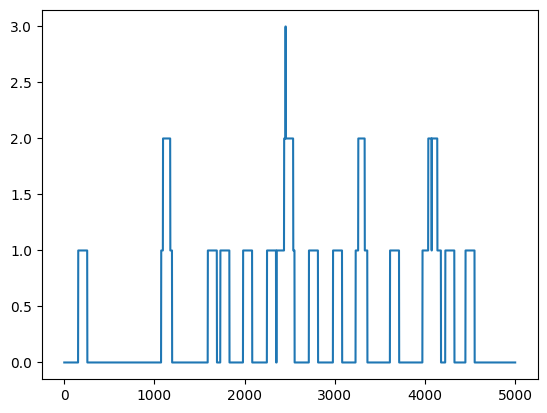

In [6]:
run(episodes=5000, is_training=True, render=False)
test(episodes=100, render=True)   # görselle test
test(episodes=1000)               # istatistiksel başarı oranı
